In [245]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from pandas import read_csv
#Lets load the dataset and sample some
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = read_csv('/kaggle/input/boston-house-prices/housing.csv', header=None, delimiter=r"\s+", names=column_names)
print(data.head(5))
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [246]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [247]:
data.describe(include ='all')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


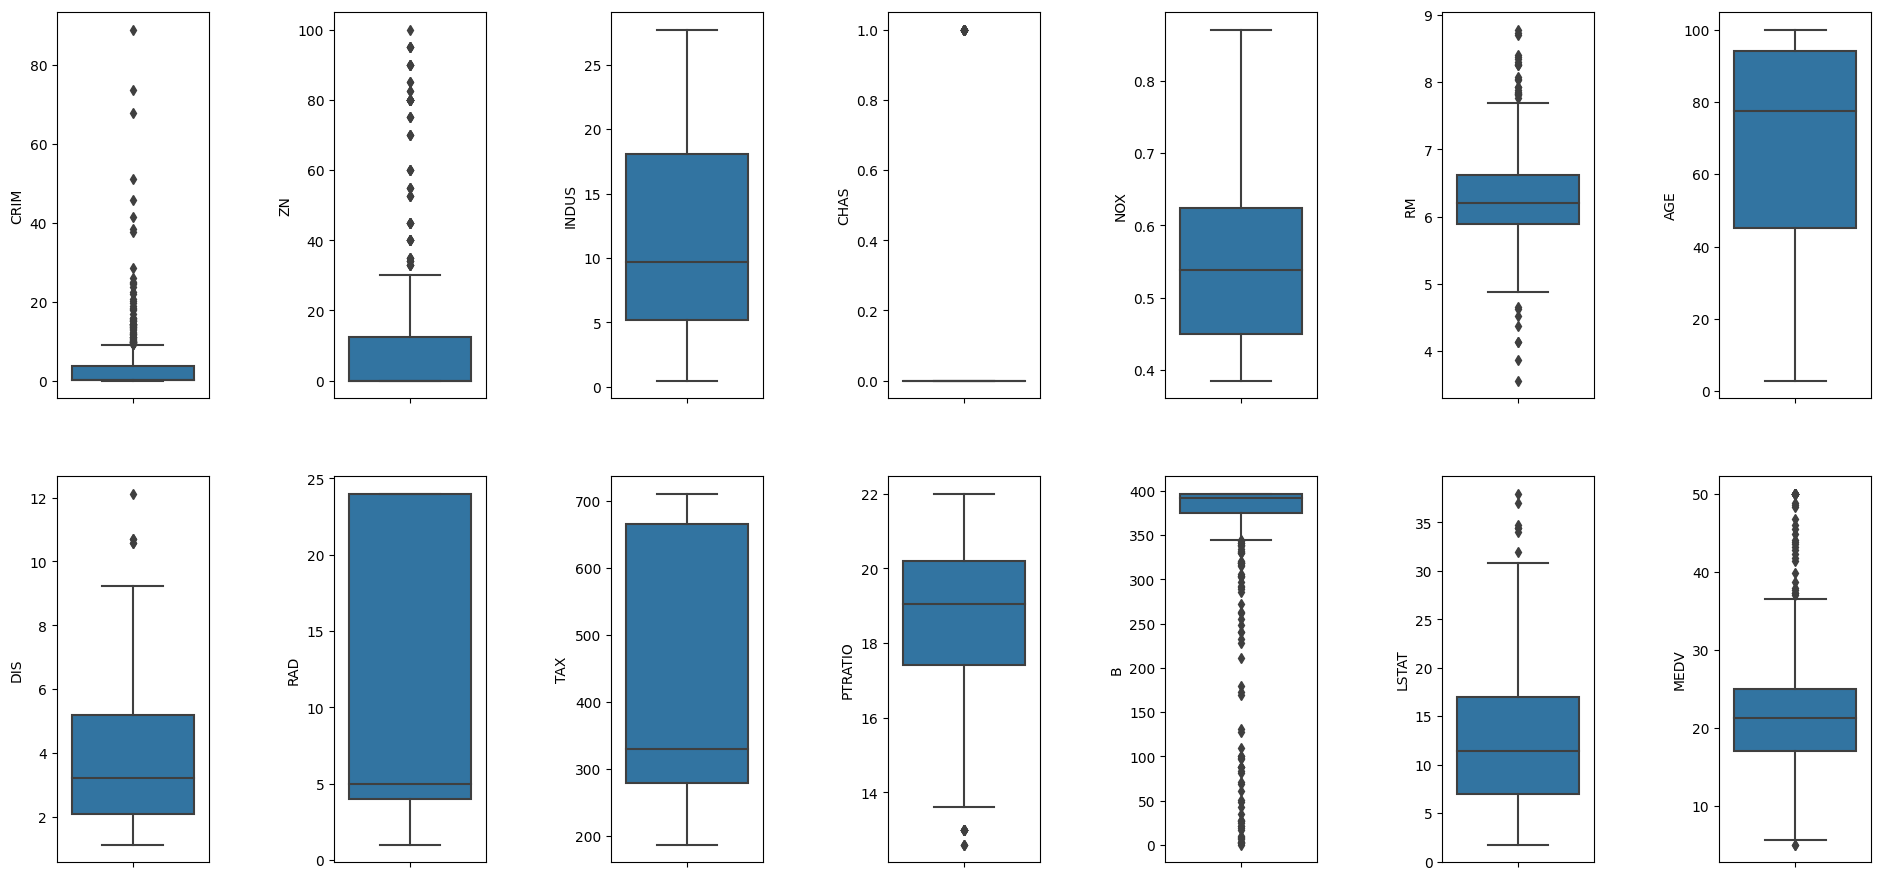

In [248]:
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import  stats
fig,ax=plt.subplots(ncols=7,nrows=2,figsize=(20,10))
index=0
ax=ax.flatten()
for k,v in data.items():
    
    sns.boxplot(y=k,data =data,ax=ax[index])
    index+=1
plt.tight_layout( pad=5, h_pad=5, w_pad=5.0)

In [249]:
  for k, v in data.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(data)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column CRIM outliers = 13.04%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 1.38%
Column MEDV outliers = 7.91%


/tmp/ipykernel_33/42577781.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v,ax=ax[index])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_33/42577781.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide

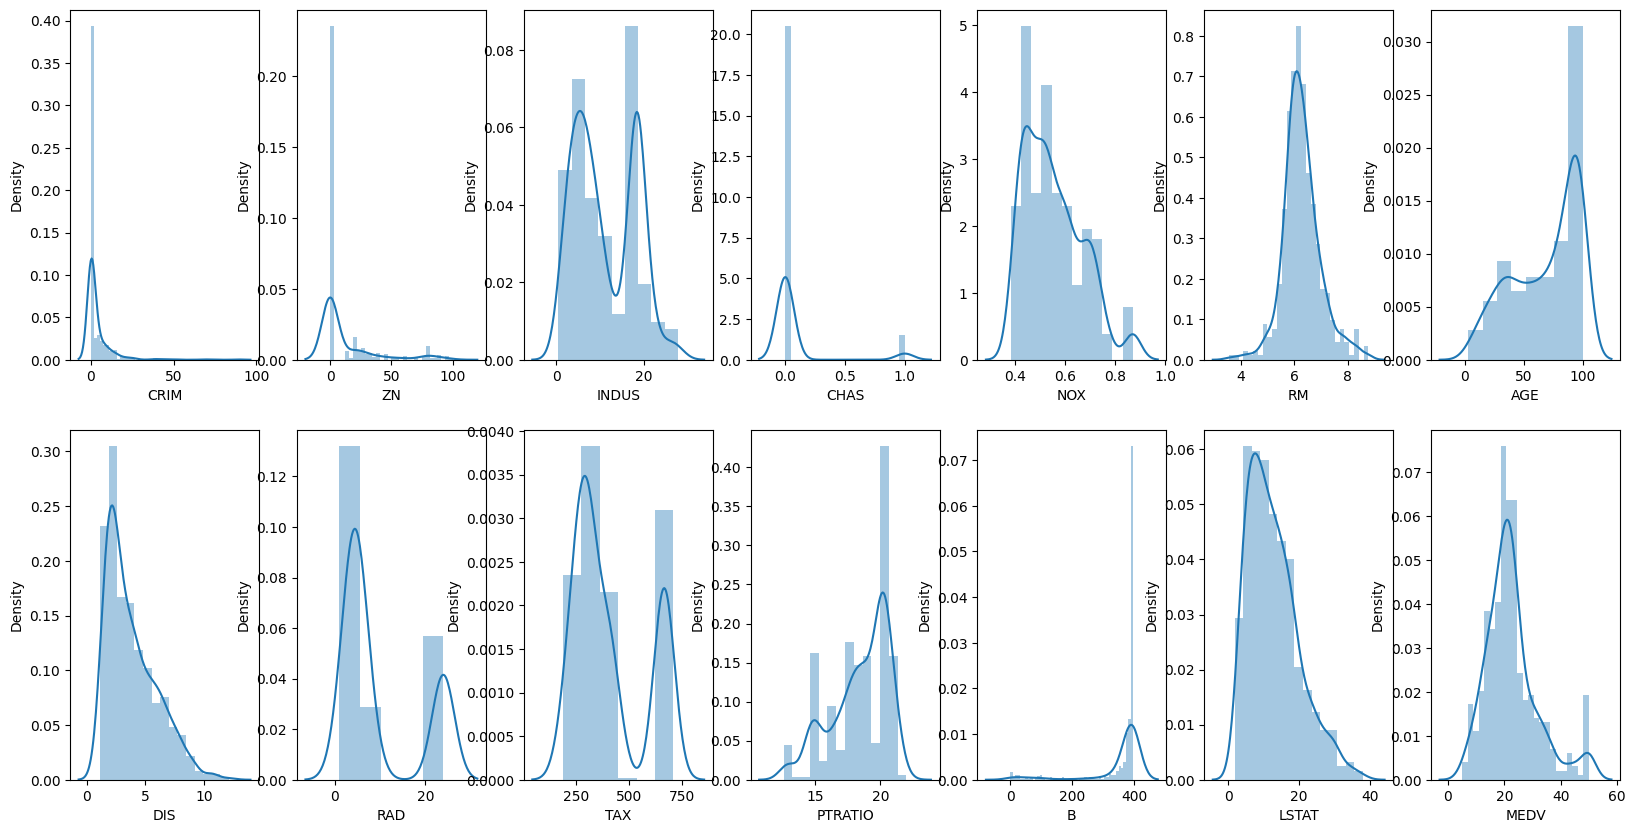

In [250]:
fig,axs=plt.subplots(ncols=7,nrows=2,figsize=(20,10))
index=0
ax=axs.flatten()
for k,v in data.items():
    sns.distplot(v,ax=ax[index])
    index+=1

<Axes: >

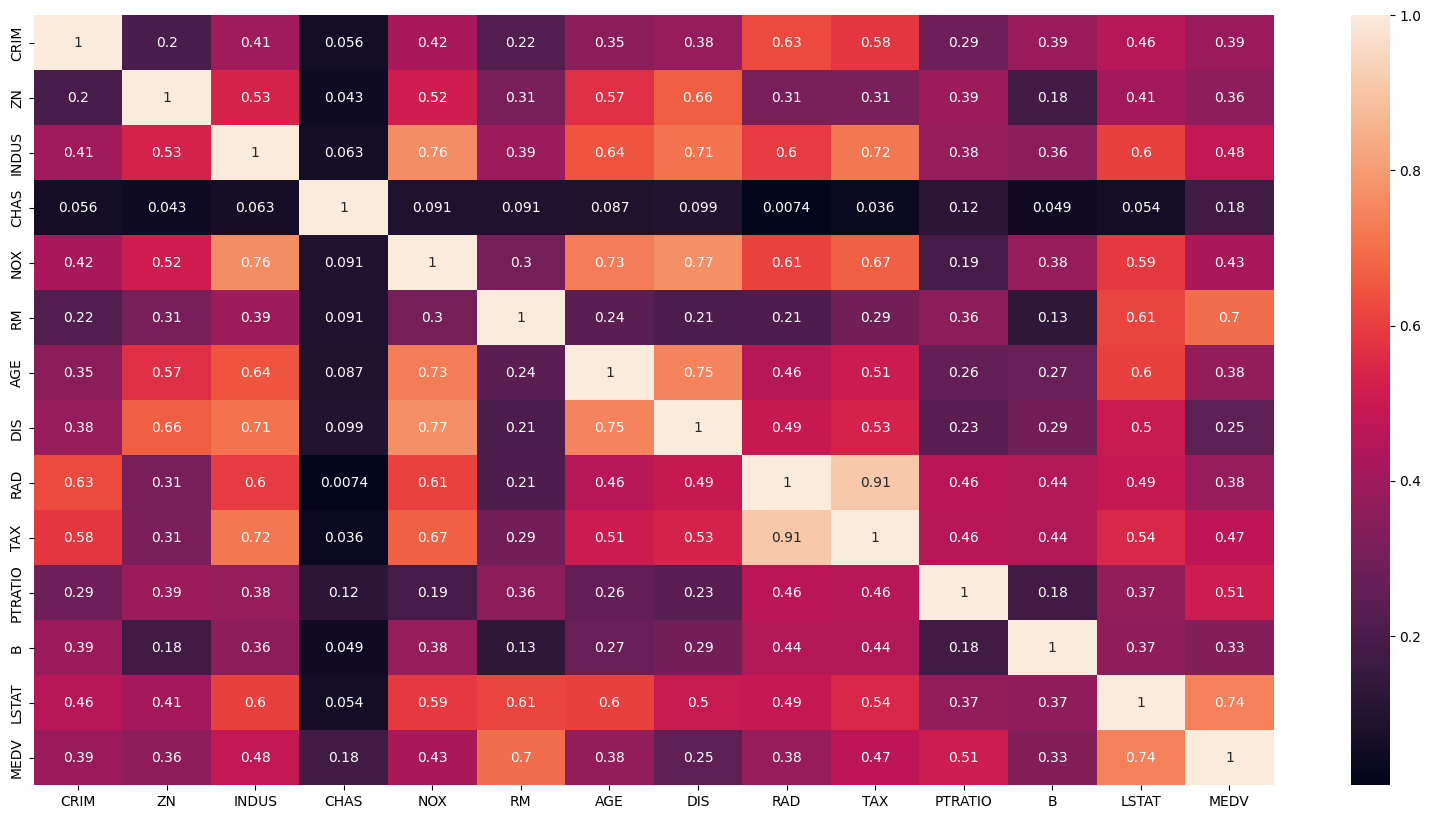

In [251]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr().abs(),  annot=True)

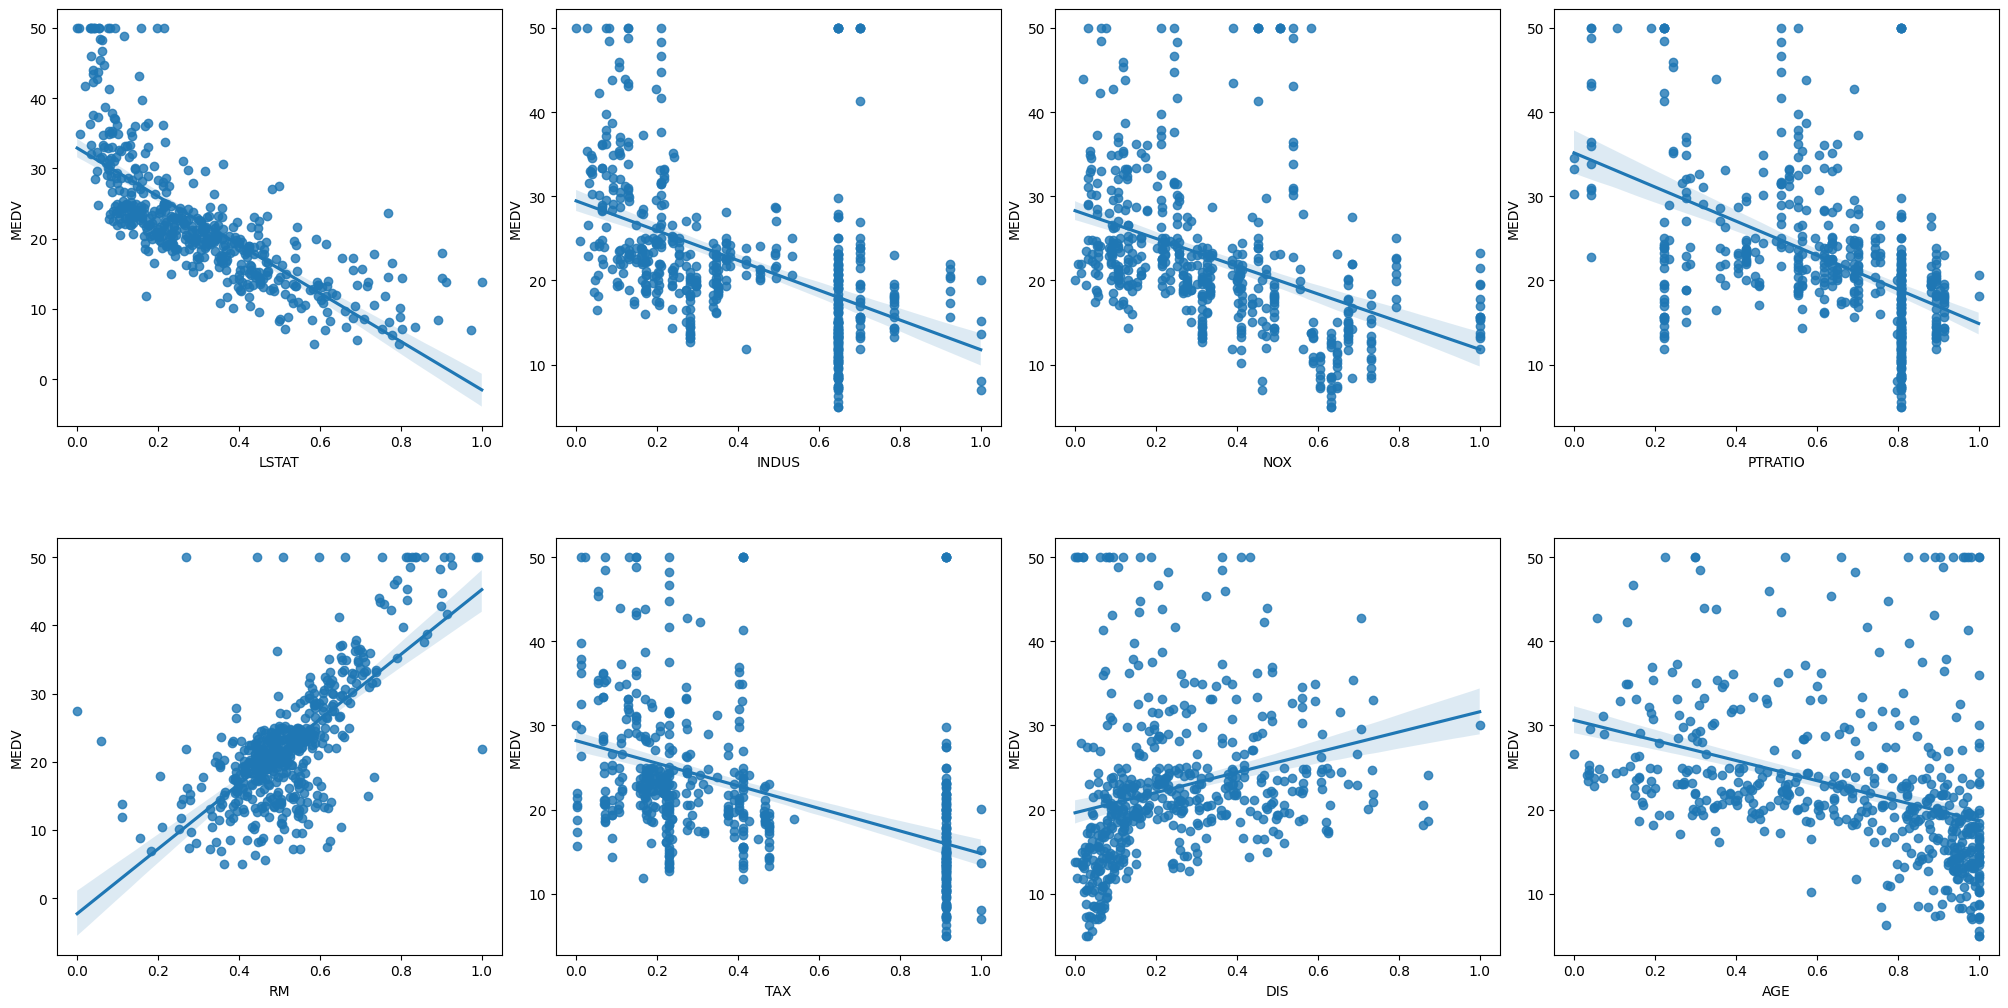

In [252]:
from sklearn import preprocessing
# Let's scale the columns before plotting them against MEDV
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
x = data.loc[:,column_sels]
y = data['MEDV']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [253]:
#remove_outliers
for k,v in data.items():
    
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    iqr = q3 - q1
    lower_bound=q1-1.5*iqr
    upper_bound=q3+1.5*iqr
    data[k]=np.where(data[k]>=upper_bound,upper_bound,
            np.where(data[k]<=lower_bound,lower_bound,data[k]))
    
    

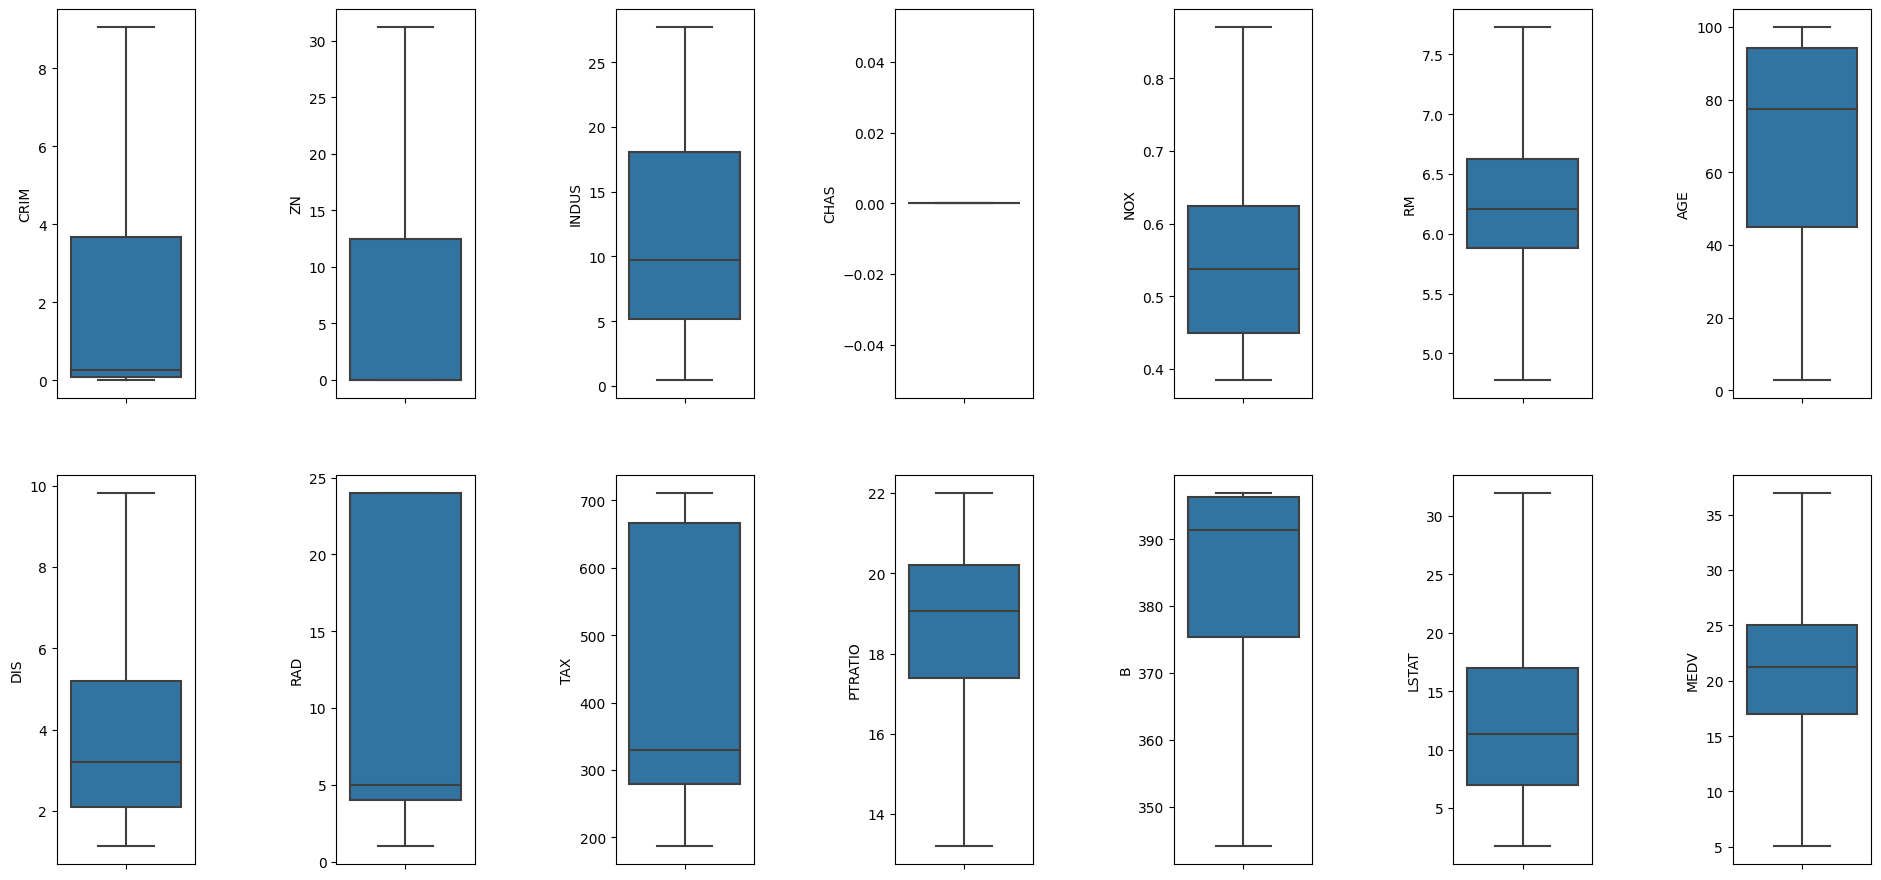

In [254]:
# check again outlier s 
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import  stats
fig,ax=plt.subplots(ncols=7,nrows=2,figsize=(20,10))
index=0
ax=ax.flatten()
for k,v in data.items():
    
    sns.boxplot(y=k,data =data,ax=ax[index])
    index+=1
plt.tight_layout( pad=5, h_pad=5, w_pad=5.0)

In [255]:
from scipy.stats import boxcox

# Loop over each column in the DataFrame x
for col in data.columns:
    # Compute the skewness of the current column
    skewness = data[col].skew()
    
    # If the skewness is greater than a threshold (e.g., 0.3)
    if abs(skewness) > 0.3:
        # Apply the Box-Cox transformation to the current column
        data[col], _ = boxcox(data[col] + 1)  # Adding 1 to handle zero and negative values


/tmp/ipykernel_33/42577781.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v,ax=ax[index])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_33/42577781.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide

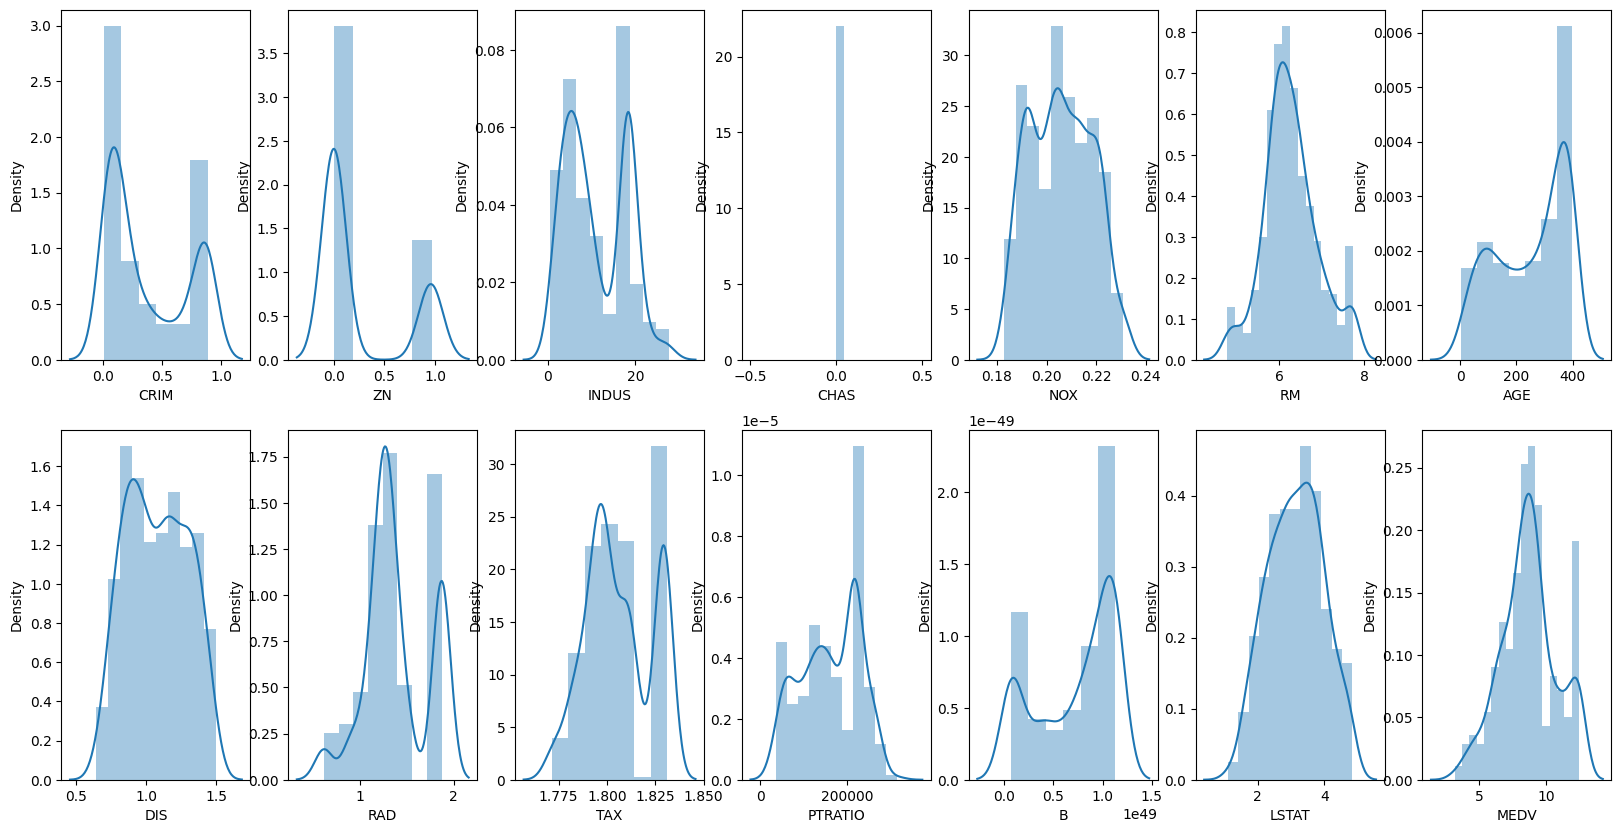

In [256]:
fig,axs=plt.subplots(ncols=7,nrows=2,figsize=(20,10))
index=0
ax=axs.flatten()
for k,v in data.items():
    sns.distplot(v,ax=ax[index])
    index+=1

In [257]:
from sklearn.preprocessing import StandardScaler

scaled = StandardScaler()
scaled_data = pd.DataFrame()  # Initialize an empty DataFrame to store scaled data

# Iterate over each column in the DataFrame
for col in data.columns:
    # Extract the column data
    column_data = data[col].values.reshape(-1, 1)
    
    # Scale the column data
    scaled_column = scaled.fit_transform(column_data)
    
    # Store the scaled column in the new DataFrame
    scaled_data[col] = scaled_column.flatten()


In [258]:

x=scaled_data.drop(columns=['MEDV'])
y=scaled_data['MEDV']

In [259]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [260]:
x_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
477,1.543708,-0.600117,1.015999,0.0,0.675047,-1.542698,1.075891,-0.835217,1.446832,1.369662,0.839458,-1.588441,1.520796
15,0.043949,-0.600117,-0.437258,0.0,0.027165,-0.700919,-0.527957,0.618918,-0.529331,-0.450925,1.430345,0.853341,-0.463291
332,-1.001398,1.685160,-0.740749,0.0,-1.111729,-0.388032,-1.554740,1.306442,-2.314674,-0.479096,-0.894004,-1.343507,-0.588520
423,1.472891,-0.600117,1.015999,0.0,0.675047,-0.273677,0.564492,-0.909391,1.446832,1.369662,0.839458,-1.651799,1.382632
19,0.147370,-0.600117,-0.437258,0.0,0.027165,-0.870863,-0.051316,0.303781,-0.529331,-0.450925,1.430345,0.302689,0.015564
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,-0.665688,-0.600117,-0.375976,0.0,-0.150736,-0.697743,0.846481,-0.735925,-0.241362,0.153259,1.352227,0.859908,0.940985
270,-0.415765,1.646362,-0.609431,0.0,-0.776901,-0.665977,-1.011166,0.590304,-0.909551,-1.446623,-0.128773,0.072610,0.265630
348,-1.057234,1.685160,-1.331682,0.0,-1.150822,0.571278,-1.382531,1.681737,-0.529331,-0.720788,-0.855507,0.301634,-0.995650
435,1.543708,-0.600117,1.015999,0.0,1.466935,0.561749,0.960593,-0.813187,1.446832,1.369662,0.839458,-1.651799,1.380879


In [261]:
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import VotingRegressor

In [262]:
regg=[LinearRegression(),SGDRegressor(),SVR(kernel='rbf'),DecisionTreeRegressor(max_depth=6)]

In [263]:
for i in regg:
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    print('r_2_score:-',r2_score(y_test,y_pred))
    print('mean_squared_error:-',mean_squared_error(y_test,y_pred))
    print()

r_2_score:- 0.772448362085884
mean_squared_error:- 0.19978555077350382

r_2_score:- 0.7619558996845259
mean_squared_error:- 0.20899771201761128

r_2_score:- 0.8469166500843845
mean_squared_error:- 0.13440396060206505

r_2_score:- 0.7421856991899901
mean_squared_error:- 0.22635553211906087



In [269]:
voting_regressor = VotingRegressor(estimators=[
    ('lr', LinearRegression()),
    ('dt', DecisionTreeRegressor(max_depth=6)),
    ('svr', SVR()),
    ('sdg', SGDRegressor())
])
    

In [270]:
voting_regressor.fit(x_train,y_train)
y_pred_vot =voting_regressor.predict(x_test)


In [271]:
print('mean_squared_error:-',mean_squared_error(y_test,y_pred_vot))
print('r2_score:-',r2_score(y_test,y_pred_vot))

mean_squared_error:- 0.14646806008359572
r2_score:- 0.8331758886211426
